In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
import pandas as pd 
import sys
%matplotlib inline
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + mpl.__version__)

Python version 3.7.2 (default, Jan  3 2019, 09:14:01) 
[GCC 8.2.1 20181215 (Red Hat 8.2.1-6)]
Pandas version 0.24.0
Matplotlib version 3.0.2


In [3]:
filepath = 'output.csv'
df = pd.read_csv(filepath)
df['strategy'] = df['strategy'].map(lambda name : name.split('.')[1].lower())
df['sample'] = df['sample'].map(lambda name : name.split('.')[0])
df.head()

,sample,hardware_type,file_system,strategy,split_time,merge_time,config_file
0,bigBrainSample0,NaN,tmpfs,clustered,8.346149,22.852410,config.json
1,bigBrainSample0,hdd,ext4,clustered,38.429100,46.021617,config.json
2,bigBrainSample0,NaN,tmpfs,multiple,12.700467,28.388806,config.json
3,bigBrainSample0,hdd,ext4,multiple,42.789440,52.074896,config.json
4,bigBrainSample0,NaN,tmpfs,naive,19.527108,16.887440,config.json


In [35]:
df.groupby([df['file_system'], df['strategy']]).describe()

split_time                                             \
                           count       mean       std        min        25%   
file_system strategy                                                          
ext4        clustered        5.0  38.119185  0.275584  37.805481  37.850480   
            multiple         5.0  42.450828  0.418558  41.889907  42.262704   
            naive            5.0  27.059864  8.018247  19.025783  19.987544   
tmpfs       clustered        5.0   8.148916  0.143761   8.008275   8.023851   
            multiple         5.0  12.403189  0.253023  12.087138  12.274271   
            naive            5.0  27.517326  8.074768  19.527108  20.387245   

                                                       merge_time              \
                             50%        75%        max      count        mean   
file_system strategy                                                            
ext4        clustered  38.255258  38.255607  38.429100        5.0   46.334921   
            multiple   42.380495  42.789440  42.931593        5.0   50.471366   
            naive      26.214934  32.327340  37.743719        5.0  321.912051   
tmpfs       clustered   8.128368   8.237938   8.346149        5.0   21.580962   
            multiple   12.335092  12.618976  12.700467        5.0   27.704178   
            naive      26.589874  32.668867  38.413534        5.0   18.424561   

                                                                      \
                             std         min         25%         50%   
file_system strategy                                                   
ext4        clustered   0.509913   45.739668   46.021617   46.404502   
            multiple    1.196591   49.481355   49.483887   49.906398   
            naive      23.669949  293.898637  316.718475  317.990530   
tmpfs       clustered   0.721237   21.100672   21.192409   21.352709   
            multiple    0.923418   26.190558   27.475983   28.091094   
            naive       1.427321   16.887440   17.204283   18.378465   

                                               
                              75%         max  
file_system strategy                           
ext4        clustered   46.414718   47.094098  
            multiple    51.410295   52.074896  
            naive      321.440816  359.511799  
tmpfs       clustered   21.406612   22.852410  
            multiple    28.374451   28.388806  
            naive       19.398962   20.253655

# Variation inter-samples, by strategy, on tmpfs

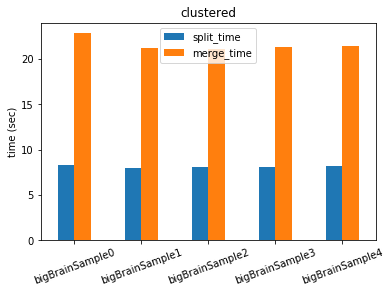

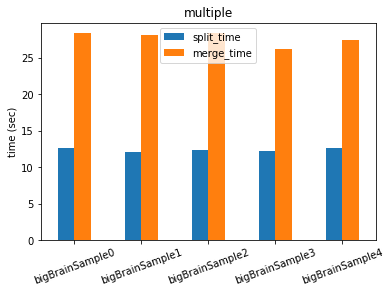

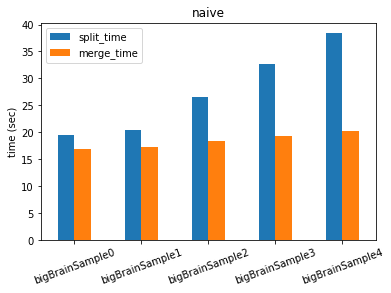

In [4]:
def plotByStrategy(strategyName, df_fs):
    df_fs=df_fs[df_fs['strategy'] == strategyName]
    ax = (df_fs[['split_time','merge_time']]).plot(kind='bar', title=strategyName)
    ax.set_xticklabels(df_fs['sample'], rotation=20)
    ax.set_ylabel("time (sec)")
    
tmpfs=df[df['file_system'] == 'tmpfs']    
plotByStrategy('clustered', tmpfs)
plotByStrategy('multiple', tmpfs)
plotByStrategy('naive', tmpfs)

# Clustered VS multiple on tmpfs (mean values)

Text(0, 0.5, 'time (sec)')

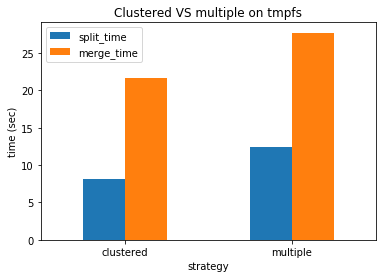

In [70]:
tmpfs=df[df['file_system'] == 'tmpfs']   
tmpfs=tmpfs[(tmpfs['strategy'] == 'multiple') | (tmpfs['strategy'] == 'clustered')]
split = DataFrame(tmpfs['split_time'].groupby(df['strategy']).mean())
merge = DataFrame(tmpfs['merge_time'].groupby(df['strategy']).mean())
comp = pd.concat([split,merge], axis=1)
ax = comp.plot(kind='bar', title='Clustered VS multiple on tmpfs')
ax.set_xticklabels(list(comp.index.values), rotation=0)
ax.set_ylabel("time (sec)")

# Variation inter-samples, by strategy, on hdd

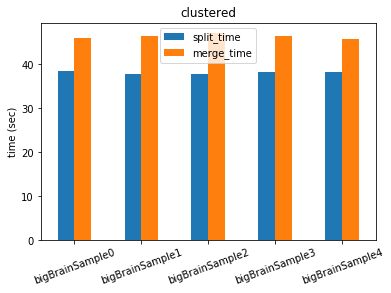

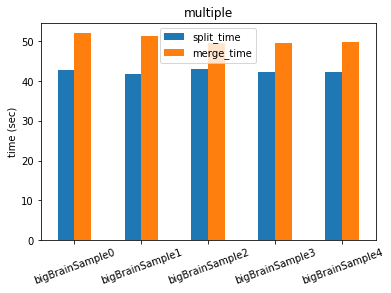

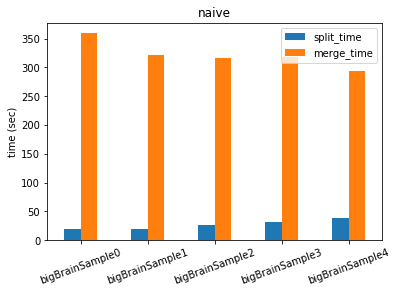

In [5]:
hdd=df[df['hardware_type'] == 'hdd']
plotByStrategy('clustered', hdd)
plotByStrategy('multiple', hdd)
plotByStrategy('naive', hdd)

# Clustered VS multiple on hdd (mean values)

Text(0, 0.5, 'time (sec)')

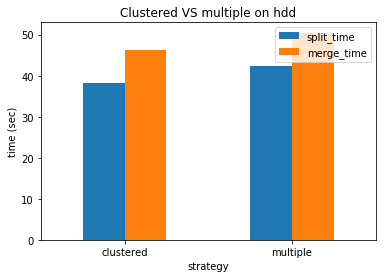

In [75]:
hdd=df[df['hardware_type'] == 'hdd']   
hdd=hdd[(hdd['strategy'] == 'multiple') | (hdd['strategy'] == 'clustered')]
split = DataFrame(hdd['split_time'].groupby(df['strategy']).mean())
merge = DataFrame(hdd['merge_time'].groupby(df['strategy']).mean())
comp = pd.concat([split,merge], axis=1)
ax = comp.plot(kind='bar', title='Clustered VS multiple on hdd')
ax.set_xticklabels(list(comp.index.values), rotation=0)
ax.set_ylabel("time (sec)")

# Ext4 VS tmpfs

Text(0, 0.5, 'time (sec)')

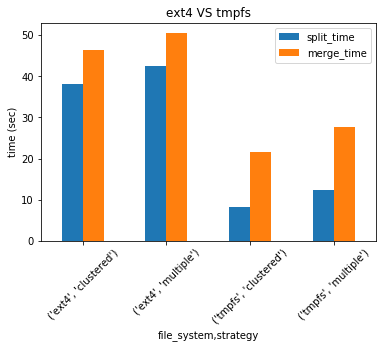

In [89]:
part=df[df['strategy']!='naive']
means = DataFrame(part.groupby([df['file_system'], df['strategy']]).mean())
ax = means.plot(kind='bar', title='ext4 VS tmpfs')
ax.set_xticklabels(list(means.index.values), rotation=45)
ax.set_ylabel("time (sec)")